# AIML CA1 - Regression Dataset
##### Done By: Ang Miao Yi

---------------------------------------------------------------------------------------------------------------------------------------------------

### Background Research (From Kaggle)
##### 1. Age: age of primary beneficiary
##### 2. Gender: female, male
##### 3. BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
##### 4. Smoker: Smoking
##### 5. Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
##### 6. Costs: Individual medical costs billed by health insurance

##### Run all codes at once (From top to bottom)

In [1]:
# Import all required libraries
# =========================================================================================================================
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # For Plotting (Scatter Graph, BoxPlot, Linear Graph etc)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
# =========================================================================================================================
dataset = pd.read_csv('./CA1-Dataset/CA1-Regression-Dataset.csv', sep=',')

In [3]:
# Checking for missing values & Type of Data
# =========================================================================================================================
print(dataset.isna().sum().sort_values()) #Checking for missing values
print(dataset.info()) # Checking for data type

ID          0
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


##### From the above cell, it can be seen that there are no missing values in our dataset, but some features categorical (type is object), so there is a need to change them to numerical using dummy variables since sklearn does not accept categorical features and show error if we try to run the code

---------------------------------------------------------------------------------------------------------------------------------

# Preprocessing of Data & Dummy Model
### 1. Creating dummy variables to replace categorical features

In [23]:
# Creating dummy variables for categorical data
# =========================================================================================================================
dataset_dummies = pd.get_dummies(dataset[['Gender', 'Smoker', 'Region']], drop_first=True)
dataset_dummies.head()

dataset_dummies = pd.concat([dataset, dataset_dummies], axis=1)
dataset_dummies = dataset_dummies.drop(['Gender', 'Smoker', 'Region'], axis=1)

dataset_dummies.head()

,ID,Age,BMI,Cost ($),Gender_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,1,19,27.900,16884.92400,False,True,False,False,True
1,2,18,33.770,1725.55230,True,False,False,True,False
2,3,28,33.000,4449.46200,True,False,False,True,False
3,4,33,22.705,21984.47061,True,False,True,False,False
4,5,32,28.880,3866.85520,True,False,True,False,False


##### The cell above is create dummy variables. Between sklearn's oneHotEncoder and pandas' get_dummies(), I chose pandas one as it is much simpler and since it is used only for preprocessing of data and not in machine learning. So we first get the columns from the dataset which has categorical values and use pandas "get_dummies", which automatically creates new columns with the values "True"(1) or "False"(0). These columns are numerical representatives of the categorical features (Refer to first output). After that, we combine the original dataset with these newly created columns and drop the categorical features from the original dataset as we do not need them anymore. We have successfully processed our data and ensured all the features are numerical (Refer to second output to see the new dataset).  

### 2. Splitting of dataset into training and test set

In [5]:
# Split dataset into training and test set
# =========================================================================================================================
from sklearn.model_selection import train_test_split
X = dataset_dummies.drop(['Cost ($)', 'ID'], axis=1).values
y = dataset_dummies['Cost ($)'].values
print(X)
print(y)
print(type(X), type(y))

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[19 27.9 False ... False False True]
 [18 33.77 True ... False True False]
 [28 33.0 True ... False True False]
 ...
 [18 36.85 False ... False True False]
 [21 25.8 False ... False False True]
 [61 29.07 False ... True False False]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


##### (Refer to the above cell) Next, after we have ensured our data is all numerical and has no missing values, we need to split the dataset into training and test sets. This is a form of model validation so that our model can be tested with unseen data, which gives us an accurate result of how well the model is.

### 3. Feature Relevance

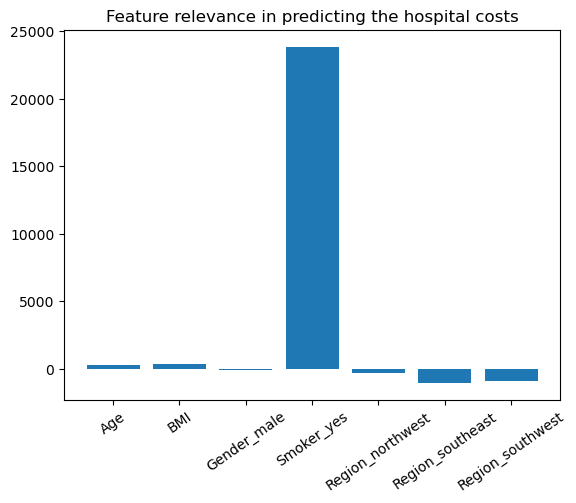

In [6]:
# Feature Relevance
# =========================================================================================================================
from sklearn.linear_model import Lasso
names = dataset_dummies.drop(["Cost ($)", 'ID'], axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=35)
plt.title("Feature relevance in predicting the hospital costs")
plt.show()

##### The cell above illustrates my process of using lasso model to show the feature relevance in determining the value of the hospital cost" and the graph is plotted for a better visualisation. From the graph, it shows that being a smoker is more likely to have a higher hospital bills, followed by BMI and age. ("Smoker_yes" is considered one of the important features)

### 4. Creating dummy regressor baseline for model comparison

In [7]:
# Create dummy regressor baseline model
# =========================================================================================================================
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

dummy_regr = DummyRegressor(strategy="median") # Strategy "median" so model tries to predict the median of the training set
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)

# Results
# Mean Abosolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Dummy Regressor Model (Baseline) \nMean Absolute Percentage Error\t: {:.2f}%'.format(mape*100)) # Round up to 2 decimal places

# R-squared
print(f"R-Squared Score\t\t\t: {dummy_regr.score(X_test, y_test)}")

# Mean Squared Error
print(f"Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred)}")

# Root Mean Squared Error
print(f"Root Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred, squared=False)}")

Dummy Regressor Model (Baseline) 
Mean Absolute Percentage Error	: 113.84%
R-Squared Score			: -0.07414940143505189
Mean Squared Error		: 166760332.00543958
Root Mean Squared Error		: 12913.571620796454


---------------------------------------------------------------------------------------------------------------------------------

# Linear Regression Model
### 1. Creating Linear Regression Model without changing anything

In [8]:
# Linear Regression Model
# =========================================================================================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Instantiate the Linear Regression Model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict the test data
y_pred = regressor.predict(X_test)


# Results
# Mean Abosolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Linear Regression Model \nMean Absolute Percentage Error\t: {:.2f}%'.format(mape*100)) # Round up to 2 decimal places

# R-squared
print(f"R-Squared Score\t\t\t: {regressor.score(X_test, y_test)}")

# Mean Squared Error
print(f"Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred)}")

# Root Mean Squared Error
print(f"Root Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred, squared=False)}")

Linear Regression Model 
Mean Absolute Percentage Error	: 48.46%
R-Squared Score			: 0.7800795892260541
Mean Squared Error		: 34142364.801804855
Root Mean Squared Error		: 5843.1468235707425


### 2. Evaluating Linear Regression using graph - Before Change

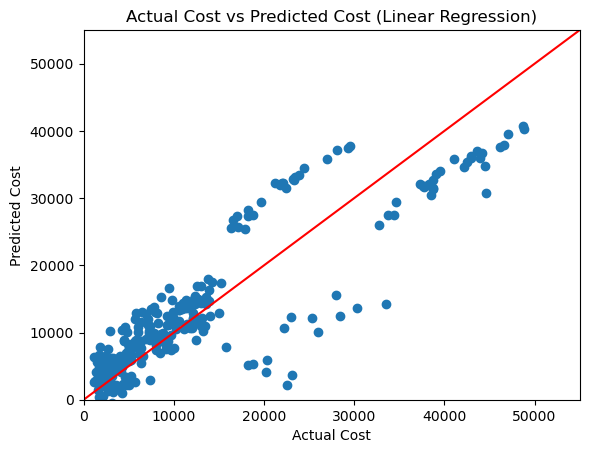

In [9]:
# Plotting the results (Predicted vs Actual)
# =========================================================================================================================
plt.xlim([0, 55000])
plt.ylim([0, 55000])
plt.scatter(y_test, y_pred)
plt.plot([0, 70000], [0, 70000], 'k-', color = 'r') # Ideal line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost vs Predicted Cost (Linear Regression)')
plt.show()

### 3. Hyperparameter Tuning of Linear Regression using Lasso and Testing

In [10]:
# Lasso Model (Regularization) - Part of Linear Regression
# =========================================================================================================================
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the Lasso Regression model
lasso = Lasso()

# Define the grid of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # Adjust the range of alpha values as needed

# Perform grid search cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train)

# Get the best alpha parameter
best_alpha = grid_result.best_params_['alpha']
print(f"Best Alpha: {best_alpha}\n")


# Create a new Lasso model using the best alpha value
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Results
# Mean Abosolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Lasso Model (Linear Regression) \nMean Absolute Percentage Error\t: {:.2f}%'.format(mape*100)) # Round up to 2 decimal places

# R-squared
print(f"R-Squared Score\t\t\t: {lasso.score(X_test, y_test)}")

# Mean Squared Error
print(f"Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred)}")

# Root Mean Squared Error
print(f"Root Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred, squared=False)}")

Best Alpha: 10.0

Lasso Model (Linear Regression) 
Mean Absolute Percentage Error	: 48.74%
R-Squared Score			: 0.7796521325440416
Mean Squared Error		: 34208726.90945497
Root Mean Squared Error		: 5848.822694308229


##### For the above cell, as linear regression model is not that complex, it does not have a lot of hyperparameter to tune, so I used regularisation. Lasso model, which is part of linear regression, is used as it has hyperparameter like alpha to tune. Hence, I imported Lasso, instantiate the model and performed a Grid Search cross Validation to find the best alpha parameter. After finding, I retrained the Lasso Model using the best alpha value and printed the results. From the results, it showed that that there wasn't any improvement in Lasso Model over the Linear Regression Model. This might be due to the fact that Lasso penalises coefficients which lead the model to exclude important predictors (features) that determine the costs of hospital bills. 

### 4. Evaluating Lasso (Linear Regression) using graph - After Change

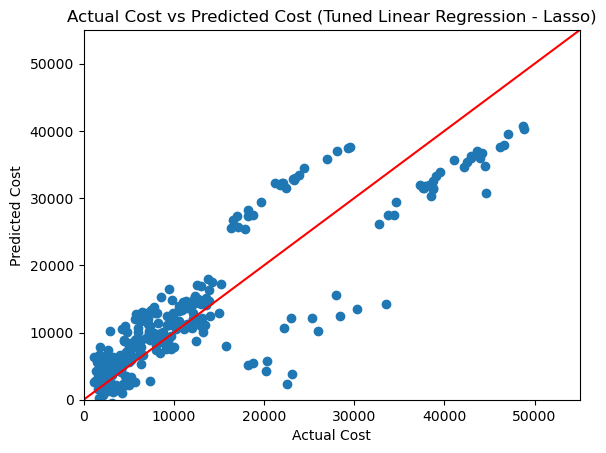

In [11]:
# Plotting the results (Predicted vs Actual)
# =========================================================================================================================
plt.xlim([0, 55000])
plt.ylim([0, 55000])
plt.scatter(y_test, y_pred)
plt.plot([0, 70000], [0, 70000], 'k-', color = 'r') # Ideal line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost vs Predicted Cost (Tuned Linear Regression - Lasso)')
plt.show()

##### By comparing the above graph with the untuned linear regression's graph, it is obvious that there is not much changes to the scatter plot as there are still visible points that lies beside the ideal line (red line). Thus, I can conclude that the hyperparameter tuning of lasso does not improve the model predicting the correct value.

---------------------------------------------------------------------------------------------------------------------------------

# Random Forest Regressor Model
### 1. Creating Random Forest Regressor Model without changing anything

In [12]:
# Random Forest Model
# =========================================================================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Instantiate the Random Forest Model
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the test data
y_pred = rf.predict(X_test)


# Mean Abosolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Random Forest Model \nMean Absolute Percentage Error\t: {:.2f}%'.format(mape*100)) # Round up to 2 decimal places

# R-squared
print(f"R-Squared Score\t\t\t: {rf.score(X_test, y_test)}")

# Mean Squared Error
print(f"Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred)}")

# Root Mean Squared Error
print(f"Root Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred, squared=False)}")

Random Forest Model 
Mean Absolute Percentage Error	: 39.34%
R-Squared Score			: 0.8480503964542279
Mean Squared Error		: 23589983.201159004
Root Mean Squared Error		: 4856.9520484722725


### 2. Evaluating Random Forest Regressor using graph - Before Change

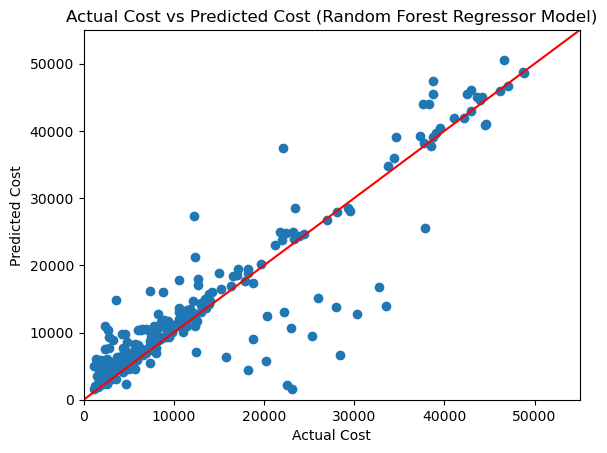

In [13]:
# Plotting the results (Predicted vs Actual)
# =========================================================================================================================
plt.xlim([0, 55000])
plt.ylim([0, 55000])
plt.scatter(y_test, y_pred)
plt.plot([0, 70000], [0, 70000], 'k-', color = 'r') # Ideal line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost vs Predicted Cost (Random Forest Regressor Model)')
plt.show()

### 3. Hyperparameter Tuning of Random Forest Regressor and Testing

In [14]:
# Random Forest Model (Hyperparameter Tuning)
# =========================================================================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Create KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the random forest model
rfreg = RandomForestRegressor()

# Create the parameter grid
param_grid = {'n_estimators': np.arange(10, 100, 10),
               'max_depth': np.arange(1, 10)}

# Perform grid search cross-validation
GScv = GridSearchCV(rfreg, param_grid, cv=kf)
GScv.fit(X_train, y_train)

# Get the best parameters
rf_best_params = GScv.best_params_
best_score = GScv.best_score_
print(f"Best params: {rf_best_params}")
print(f"Best score: {best_score}")


# Training the model (Random Forest Regressor) - AFTER hyperparameter tuning
# =========================================================================================================================
# Instantiate the Random Forest Regressor using the best parameters
rfreg = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth'])

# Fit the rfreg model into the training data
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)

# Mean Abosolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('\nRandom Forest Model \nMean Absolute Percentage Error\t: {:.2f}%'.format(mape*100)) # Round up to 2 decimal places

# R-squared
print(f"R-Squared Score\t\t\t: {rf.score(X_test, y_test)}")

# Mean Squared Error
print(f"Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred)}")

# Root Mean Squared Error
print(f"Root Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred, squared=False)}")

Best params: {'max_depth': 4, 'n_estimators': 40}
Best score: 0.8533419643949942

Random Forest Model 
Mean Absolute Percentage Error	: 34.80%
R-Squared Score			: 0.8480503964542279
Mean Squared Error		: 20210935.73539689
Root Mean Squared Error		: 4495.657430832212


##### From the above cell, I am performing hyperparameter tuning for the random forest regressor, specifically the parameter "n_estimators" and "max_depth". These two affect the model in predicting the costs as "n_estimators" affect the number of trees in the forest, which can potentially lead to the model having a better visualisation of data, thus increasing model's performance. For "max_depth", it affects how far the tree can go, meaning having the optimal "max_depth" prevents overfitting. So, I did a Grid Search Cross Validation which finds the best parameters and after finding out the optimal parameters, I retrained the random forest regressor and printed the results. From the results, it showed that the Mean Absolute Percentage Error has decrease from about 37% to about 35% (results differ), meaning that the model has more correct predictions. It is the same as other metrics too, with visible improvements of the R-squared Score, Mean Squared Error and Root Mean Squared Error. Therefore, I can conclude that hyperparameter tuning of random forest regressor works well in improving the model.

### 4. Evaluating Random Forest Regressor using graph - After Change

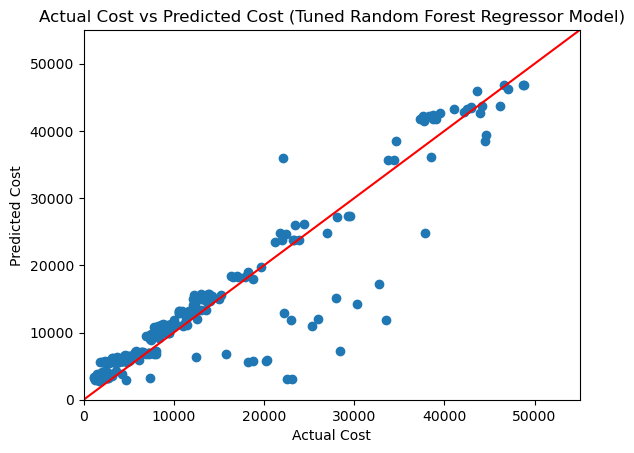

In [15]:
# Plotting the results (Predicted vs Actual)
# =========================================================================================================================
plt.xlim([0, 55000])
plt.ylim([0, 55000])
plt.scatter(y_test, y_pred)
plt.plot([0, 70000], [0, 70000], 'k-', color = 'r') # Ideal line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost vs Predicted Cost (Tuned Random Forest Regressor Model)')
plt.show()

##### From the graph above, we can see that the points plotted on the graph are mostly very near the ideal line with some exception at the bottom of the graph. This shows that the tuned random forest regressor predicts the hospital costs that are close to the actual value, which is an improvement over the untuned model by looking at the graph of the untuned model. Hence, the hyperparameter tuning of the random forest regressor works. 

---------------------------------------------------------------------------------------------------------------------------------------

# AdaBoost Regressor
### 1. Creating AdaBoost Regressor without changing anything

In [16]:
# AdaBoost Model
# =========================================================================================================================
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Instantiate the AdaBoost Model
ada = AdaBoostRegressor()

# Fit the model into the training data
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

# Mean Abosolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('AdaBoost Model \nMean Absolute Percentage Error\t: {:.2f}%'.format(mape*100)) # Round up to 2 decimal places

# R-squared
print(f"R-Squared Score\t\t\t: {ada.score(X_test, y_test)}")

# Mean Squared Error
print(f"Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred)}")

# Root Mean Squared Error
print(f"Root Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred, squared=False)}")

AdaBoost Model 
Mean Absolute Percentage Error	: 73.34%
R-Squared Score			: 0.8170488880271576
Mean Squared Error		: 28402928.058793195
Root Mean Squared Error		: 5329.439750930035


### 2. Evaluating of AdaBoost Regressor using graph - Before Change

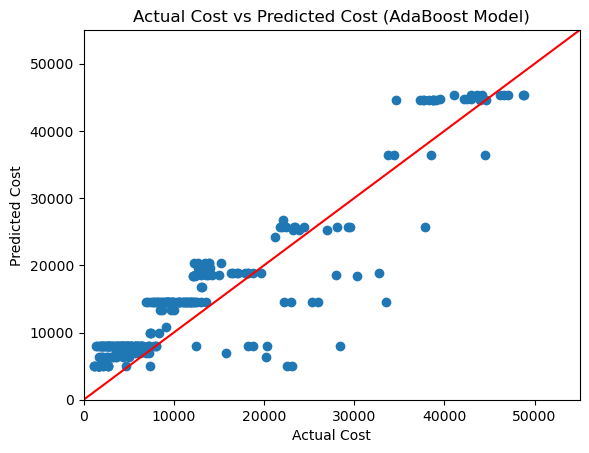

In [17]:
# Plotting the results (Predicted vs Actual)
# =========================================================================================================================
plt.xlim([0, 55000])
plt.ylim([0, 55000])
plt.scatter(y_test, y_pred)
plt.plot([0, 70000], [0, 70000], 'k-', color = 'r') # Ideal line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost vs Predicted Cost (AdaBoost Model)')
plt.show()

### 3. Hyperparameter tuning of AdaBoost Regressor Model and Testing

In [18]:
# Adaboost Regressor Hyperparameter tuning
# =========================================================================================================================
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Create KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the AdaBoost model
ada = AdaBoostRegressor()

# Create the parameter grid
param_grid = {'n_estimators': np.arange(10, 100, 10),
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Perform grid search cross-validation
GScv = GridSearchCV(ada, param_grid, cv=kf)
GScv.fit(X_train, y_train)

# Get the best parameters
ada_best_params = GScv.best_params_
best_score = GScv.best_score_
print(f"Best params: {ada_best_params}")
print(f"Best score: {best_score}")


# Training the model (Adaboost Regressor) - AFTER hyperparameter tuning
# =========================================================================================================================
# Instantiate the Adaboost Regressor using the best parameters
ada = AdaBoostRegressor(n_estimators=ada_best_params['n_estimators'], learning_rate=ada_best_params['learning_rate'])

# Fit the rfreg model into the training data
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

# Mean Abosolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('\nAdaBoost Model \nMean Absolute Percentage Error\t: {:.2f}%'.format(mape*100)) # Round up to 2 decimal places

# R-squared
print(f"R-Squared Score\t\t\t: {ada.score(X_test, y_test)}")

# Mean Squared Error
print(f"Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred)}")

# Root Mean Squared Error
print(f"Root Mean Squared Error\t\t: {mean_squared_error(y_test, y_pred, squared=False)}")

Best params: {'learning_rate': 0.0001, 'n_estimators': 70}
Best score: 0.8490731774777668

AdaBoost Model 
Mean Absolute Percentage Error	: 38.67%
R-Squared Score			: 0.8578752459925469
Mean Squared Error		: 22064687.773237437
Root Mean Squared Error		: 4697.306438081024


##### For the above cell, I tuned two hyperparameters, "learning_rate" and "n_estimators". "learning_rate" affects the impact of the weak regressor learner, e.g. if a small learning rate is used, it means the final prediction is less impacted by the weak regressor learner, and vice versa. For "n_estimators", changing it limit the number of estimators. So, I performed a Grid Search Cross Validation to find the best parameters. After finding them, I retrained the model using them and printed the results. From the results, it showed that the Mean Absolute Percentage Error decrease drastically from about 81% to about 39%, meaning the model is much better at predicting the costs correctly. Subsequently, the R-Squared, Mean Squared Error and Root Mean Squared Error has all improved, with the R-squared increasing and the rest decreasing. Hence, I can conclude that hyperparameter tuning helps improve AdaBoost Regressor Model in predicting correctly.

### 4. Evaluating of AdaBoost Regressor Model using graph - After change

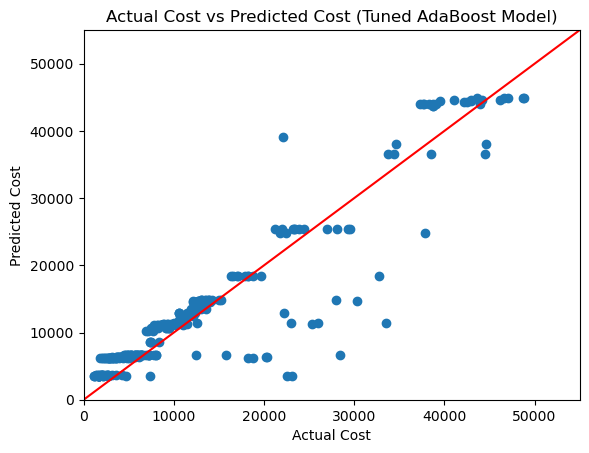

In [19]:
# Plotting the results (Predicted vs Actual)
# =========================================================================================================================
plt.xlim([0, 55000])
plt.ylim([0, 55000])
plt.scatter(y_test, y_pred)
plt.plot([0, 70000], [0, 70000], 'k-', color = 'r') # Ideal line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual Cost vs Predicted Cost (Tuned AdaBoost Model)')
plt.show()

##### From the graph, the points plotted on the graph are closer to the ideal line (red line) when compared to the untuned AdaBoost graph. This shows that the tuned AdaBoost Model has improve its ability to predict by changing its hyperparameter. 

---------------------------------------------------------------------------------------------------------------------------------

# Comparison of all regression models

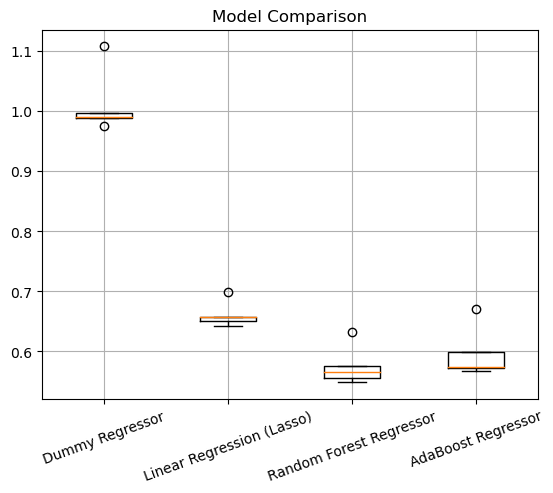

In [20]:
# Evaluating regression models using boxplots for MAPE
# =========================================================================================================================
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create a list of regression models (Dummy Regressor, Linear Regressor, Lasso, Random Forest Regressor, AdaBoost) - With the best parameters from tuning earlier
models = {"Dummy Regressor": DummyRegressor(strategy="median"),
          "Linear Regression (Lasso)": Lasso(best_alpha),
          "Random Forest Regressor": RandomForestRegressor(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth']),
          "AdaBoost Regressor": AdaBoostRegressor(n_estimators=ada_best_params['n_estimators'], learning_rate=ada_best_params['learning_rate'])}

# Create empty list to store the cross validation results of each model
results = []

# loop through models to get the cross validation results
for model in models.values():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results.append(np.sqrt(-cv_results))

# Plot the results using boxplot
plt.boxplot(results, labels=models.keys())
plt.title("Model Comparison")
plt.xticks(rotation=20)
plt.grid()
plt.show()

# Different Scoring
# MAPE = 'neg_mean_absolute_percentage_error'
# R^2 = 'r2' # Remove the negative sign at "cv_results"
# Mean Squared Error (MSE) = 'neg_mean_squared_error'
# Root Mean Squared Error (RMSE) = 'neg_root_mean_squared_error'

##### From the boxplot diagram, it shows all three models are better than the dummy regressor as all mean absolute percentage error (MAPE) of the three modes are lower. The model with the lowest error is random forest regressor as it has the lowest MAPE score, meaning the predicted values are more likely to be closer to the actual value. It then followed by AdaBoost Regressor and Linear Regression (Lasso).

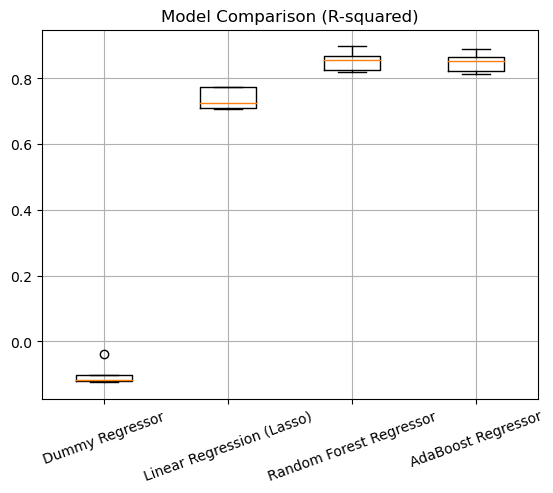

In [21]:
# Evaluating regression models using boxplots for R-Squared
# =========================================================================================================================
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Create a list of regression models (Dummy Regressor, Linear Regressor, Lasso, Random Forest Regressor, AdaBoost) - With the best parameters from tuning earlier
models = {
    "Dummy Regressor": DummyRegressor(strategy="median"),
    "Linear Regression (Lasso)": Lasso(alpha=best_alpha),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth']),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=ada_best_params['n_estimators'], learning_rate=ada_best_params['learning_rate'])
}

# Create empty list to store the cross validation results of R-squared for each model
results = []

# Loop through models to get the cross validation results for R-squared
for model in models.values():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    results.append(cv_results)

# Plot the results using boxplot for R-squared
plt.boxplot(results, labels=models.keys())
plt.title("Model Comparison (R-squared)")
plt.xticks(rotation=20)
plt.grid()
plt.show()

## End Of Report